In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
pwd

'C:\\Users\\lourd'

In [6]:
path = 'D:\Virtual Internship'
os.chdir(path)

In [7]:
pwd

'D:\\Virtual Internship'

In [8]:
ds = pd.read_excel('ANZ.xlsx')

In [9]:
ds.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [16]:
ds['txn_description'].nunique()

6

In [18]:
print(ds['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [28]:
ds1=ds[['txn_description','first_name', 'balance','amount','customer_id']]
ds1

,txn_description,first_name,balance,amount,customer_id
0,POS,Diana,35.39,16.25,CUS-2487424745
1,SALES-POS,Diana,21.20,14.19,CUS-2487424745
2,POS,Michael,5.71,6.42,CUS-2142601169
3,SALES-POS,Rhonda,2117.22,40.90,CUS-1614226872
4,SALES-POS,Diana,17.95,3.25,CUS-2487424745
...,...,...,...,...,...
12038,POS,Melissa,14054.14,9.79,CUS-55310383
12039,SALES-POS,Robert,9137.79,63.87,CUS-2688605418
12040,POS,Craig,45394.57,43.96,CUS-2663907001
12041,SALES-POS,Tyler,11350.67,30.77,CUS-1388323263


In [33]:
ds_sal = ds1.groupby(['customer_id']).mean().reset_index()
ds_sal.head()

,customer_id,balance,amount
0,CUS-1005756958,2275.852055,222.862603
1,CUS-1117979751,9829.929000,339.843700
2,CUS-1140341822,5699.212250,212.632500
3,CUS-1147642491,9032.841186,245.600169
4,CUS-1196156254,22272.433755,147.145796


In [43]:
#Average salary for each customer

ds_salary= ds1[ds1['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()
ds_salary.head()

,balance,amount
customer_id,,
CUS-1005756958,4718.665385,970.47
CUS-1117979751,11957.202857,3578.65
CUS-1140341822,5841.720000,1916.51
CUS-1147642491,8813.467692,1711.39
CUS-1196156254,23845.717143,3903.73


In [58]:
salaries = []

for customer_id in ds1["customer_id"]:
    salaries.append(int(ds_salary.loc[customer_id]["amount"]))
    
ds["annual_salary"] = salaries
ds_sal = ds1.groupby("customer_id").mean()
ds_sal.head()

,balance,amount,annual_salary
customer_id,,,
CUS-1005756958,2275.852055,222.862603,970
CUS-1117979751,9829.929000,339.843700,3578
CUS-1140341822,5699.212250,212.632500,1916
CUS-1147642491,9032.841186,245.600169,1711
CUS-1196156254,22272.433755,147.145796,3903


In [66]:
#Correlation
ds_sal['balance'].corr(ds_sal['annual_salary'])

0.20564308404356624

In [69]:
ds_sal['annual_salary'].corr(ds_sal['amount'])


0.2894398589203173

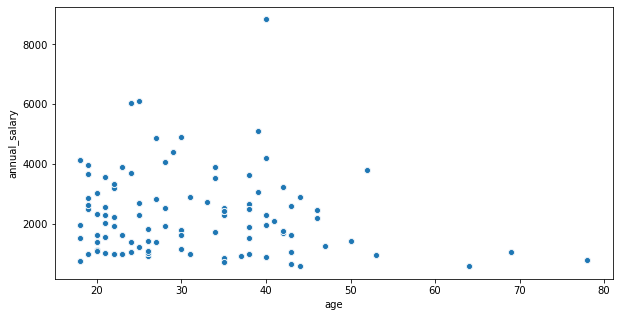

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot('age','annual_salary',data=ds)

In [ ]:
#Predicting model


In [89]:
N_train = int(len(ds_sal)*0.8)
X_train = ds_sal.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = ds_sal["annual_salary"].iloc[:N_train]
X_test = ds_sal.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = ds_sal["annual_salary"].iloc[N_train:]

In [91]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [94]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.16638343004817369

In [95]:
linear_reg.predict(X_test)

array([1960.88490517, 2612.11072545, 1842.88503339, 1876.64984762,
       2103.52697069, 1932.53217184, 1543.05186879, 4691.73478155,
       1879.05925407, 1802.8475837 , 1569.96005284, 2742.0383381 ,
       1818.03238128, 3567.93507181, 1885.62332572, 2031.27115154,
       1797.57995877, 1419.867894  , 1785.30451133, 2088.58624863])

In [96]:
linear_reg.score(X_test, Y_test)

-0.29128490463981604

In [100]:
#Decision Tree

ds_cat = ds[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [102]:
pd.get_dummies(ds_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [106]:
N_train = int(len(ds)*0.8)
X_train = pd.get_dummies(ds_cat).iloc[:N_train]
Y_train = ds["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(ds_cat).iloc[N_train:]
Y_test = ds["annual_salary"].iloc[N_train:]

In [107]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [108]:
decision_tree_class = DecisionTreeClassifier()

In [109]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.7882499481004774

In [110]:
decision_tree_class.predict(X_test)

array([1013, 1043, 4132, ..., 4054, 1043,  996], dtype=int64)

In [111]:
decision_tree_class.score(X_test, Y_test)

0.755500207555002

In [112]:
#Regression
decision_tree_reg = DecisionTreeRegressor()

In [113]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7468978726536879

In [114]:
decision_tree_reg.predict(X_test)

array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [115]:
decision_tree_reg.score(X_test, Y_test)

0.6730985323156436